<a href="https://colab.research.google.com/github/keinam53/Deep_learning/blob/main/2_Keras/4_Callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Callbacks - wywołania zwrotne

1. [Budowa sieci neuronowej](#a0)
2. [Trenowanie modelu](#a1)
3. [ModelCheckpoint - Zapisywanie wag po każdej poprawie modelu](#a2)
4. [ModelCheckpoint - Zapisanie najlepszego modelu](#a3)
5. [Early Stopping - wczesne zatrzymanie](#a4)
6. [Tensorboard](#a5)



Klasyfikator wieloklasowy - Digit Recognition

In [1]:
# %tensorflow_version 2.x  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.6.0


Załadowanie i przygotowanie danych

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11501568/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [4]:
print(X_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 18

In [5]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [6]:
X_train = X_train / 255.
X_test = X_test / 255.

Eksploracja danych

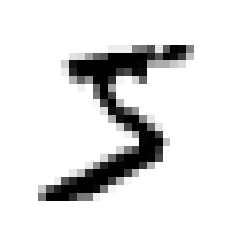

In [8]:
plt.imshow(X_train[0], cmap='gray_r')
_ = plt.axis('off')

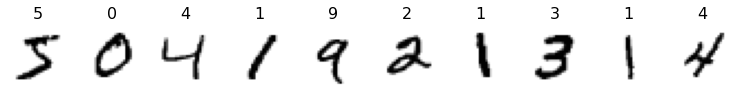

In [11]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='black', fontsize=16)
    plt.axis('off')
plt.show()

### <a name='a0'></a> Budowa sieci neuronowej

In [14]:
def build_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### <a name='a1'></a> Trenowanie modelu

In [15]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3223 - accuracy: 0.9064 - val_loss: 0.1488 - val_accuracy: 0.9586
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1542 - accuracy: 0.9542 - val_loss: 0.1233 - val_accuracy: 0.9613
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1136 - accuracy: 0.9653 - val_loss: 0.0935 - val_accuracy: 0.9726
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0954 - accuracy: 0.9705 - val_loss: 0.0852 - val_accuracy: 0.9747
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0768 - accuracy: 0.9753 - val_loss: 0.0803 - val_accuracy: 0.9743
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0675 - accuracy: 0.9784 - val_loss: 0.0834 - val_accuracy: 0.9748
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0605 - accuracy: 0.9807 - val_loss: 0.0773 - val_accuracy:

### <a name='a2'> </a>ModelCheckpoint - Zapisywanie wag po każdej poprawie modelu

Za każdym razem gdy monitorowana metryka ulega poprawie wagi są zapisywane do pliku.  
Wykorzystamy klasę **ModelCheckpoint** do obserwowania metryki **accuracy** na zbiorze walidacyjnym.

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

!mkdir model
filepath = 'model/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5'

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [17]:
from tensorflow.python.keras import callbacks
model_1 = build_model()
history = model_1.fit(x=X_train, y=y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=checkpoint)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3216 - accuracy: 0.9045 - val_loss: 0.1550 - val_accuracy: 0.9578

Epoch 00001: val_accuracy improved from -inf to 0.95775, saving model to model/weights-01-0.9578.hdf5
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1539 - accuracy: 0.9543 - val_loss: 0.1164 - val_accuracy: 0.9659

Epoch 00002: val_accuracy improved from 0.95775 to 0.96592, saving model to model/weights-02-0.9659.hdf5
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1163 - accuracy: 0.9648 - val_loss: 0.0983 - val_accuracy: 0.9712

Epoch 00003: val_accuracy improved from 0.96592 to 0.97117, saving model to model/weights-03-0.9712.hdf5
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0962 - accuracy: 0.9705 - val_loss: 0.0918 - val_accuracy: 0.9730

Epoch 00004: val_accuracy improved from 0.97117 to 0.97300, saving model to model/weights-04-0.9730.hdf5
Epo

### <a name='a3'></a>ModelCheckpoint - Zapisanie najlepszego modelu

In [18]:
filepath = 'best_model_weights.hdf5'

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

model_2 = build_model()
history = model_2.fit(x=X_train, y=y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=checkpoint)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3167 - accuracy: 0.9083 - val_loss: 0.1609 - val_accuracy: 0.9544

Epoch 00001: val_accuracy improved from -inf to 0.95442, saving model to best_model_weights.hdf5
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1547 - accuracy: 0.9534 - val_loss: 0.1158 - val_accuracy: 0.9673

Epoch 00002: val_accuracy improved from 0.95442 to 0.96733, saving model to best_model_weights.hdf5
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1148 - accuracy: 0.9660 - val_loss: 0.0992 - val_accuracy: 0.9718

Epoch 00003: val_accuracy improved from 0.96733 to 0.97175, saving model to best_model_weights.hdf5
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0940 - accuracy: 0.9723 - val_loss: 0.0895 - val_accuracy: 0.9737

Epoch 00004: val_accuracy improved from 0.97175 to 0.97375, saving model to best_model_weights.hdf5
Epoch 5/10
1500/1500 [=

##### Załadowanie wag i ocena modelu

In [22]:
best_model = Sequential()
best_model.add(Flatten(input_shape=(28, 28)))
best_model.add(Dense(units=128, activation='relu'))
best_model.add(Dropout(rate=0.2))
best_model.add(Dense(units=10, activation='softmax'))

best_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

best_model.load_weights('best_model_weights.hdf5')

test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f'{test_accuracy:.4f}')
print(f'{test_loss:.4f}')

0.9776
0.0747


###  <a name='a4'></a>Early Stopping - wczesne zatrzymanie
Klasa **EarlyStopping** pozwala na wcześniejsze zatrzymanie procesu trenowania sieci, gdy obserwowna metryka zacznie się pogarszać. 

In [23]:
model_3 = build_model()
history_3 = model_3.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=32)

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3251 - accuracy: 0.9055 - val_loss: 0.1583 - val_accuracy: 0.9538
Epoch 2/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1597 - accuracy: 0.9540 - val_loss: 0.1177 - val_accuracy: 0.9644
Epoch 3/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1197 - accuracy: 0.9642 - val_loss: 0.0996 - val_accuracy: 0.9712
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0958 - accuracy: 0.9715 - val_loss: 0.0923 - val_accuracy: 0.9727
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0817 - accuracy: 0.9752 - val_loss: 0.0898 - val_accuracy: 0.9728
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0717 - accuracy: 0.9774 - val_loss: 0.0821 - val_accuracy: 0.9750
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0625 - accuracy: 0.9803 - val_loss: 0.0850 - val_accuracy:

In [24]:
metrics = pd.DataFrame(history_3.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.325089,0.905479,0.158311,0.953833
1,0.159673,0.953979,0.117750,0.964417
2,0.119670,0.964229,0.099626,0.971250
3,0.095849,0.971458,0.092338,0.972667
4,0.081714,0.975208,0.089847,0.972750


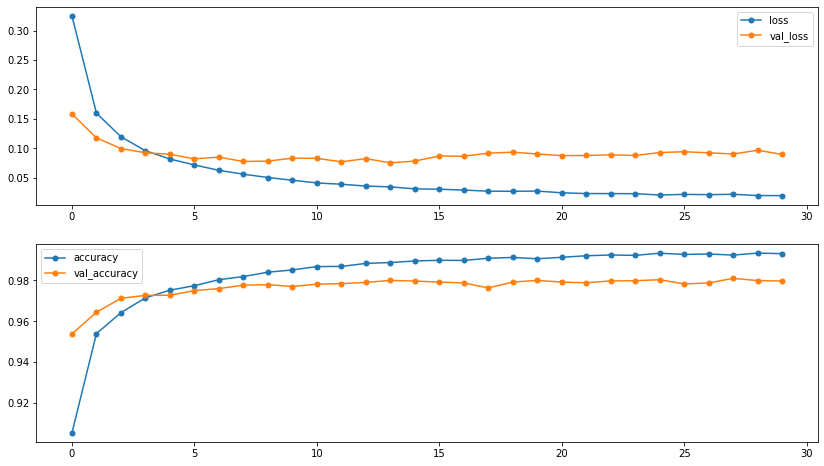

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.subplot(211)
plt.plot(metrics.index, metrics['loss'], marker = '.', markersize = 10, label='loss')
plt.plot(metrics.index, metrics['val_loss'], marker = '.', markersize = 10, label='val_loss')
plt.legend()
plt.subplot(212)
plt.plot(metrics.index, metrics['accuracy'], marker = '.', markersize = 10, label='accuracy')
plt.plot(metrics.index, metrics['val_accuracy'], marker = '.', markersize = 10, label='val_accuracy')
plt.legend()
plt.show()

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

model_4 = build_model()
history_4 = model_4.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=32, callbacks=es)

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3282 - accuracy: 0.9043 - val_loss: 0.1506 - val_accuracy: 0.9592
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1563 - accuracy: 0.9539 - val_loss: 0.1147 - val_accuracy: 0.9672
Epoch 3/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1176 - accuracy: 0.9642 - val_loss: 0.1027 - val_accuracy: 0.9687
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0942 - accuracy: 0.9714 - val_loss: 0.0893 - val_accuracy: 0.9730
Epoch 5/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0789 - accuracy: 0.9756 - val_loss: 0.0849 - val_accuracy: 0.9750
Epoch 6/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0712 - accuracy: 0.9775 - val_loss: 0.0787 - val_accuracy: 0.9761
Epoch 7/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0617 - accuracy: 0.9805 - val_loss: 0.0770 - val_accuracy:

In [32]:
metrics = pd.DataFrame(history_4.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.328218,0.904292,0.150628,0.959250
1,0.156348,0.953875,0.114733,0.967250
2,0.117603,0.964167,0.102737,0.968667
3,0.094212,0.971438,0.089304,0.973000
4,0.078896,0.975604,0.084942,0.975000


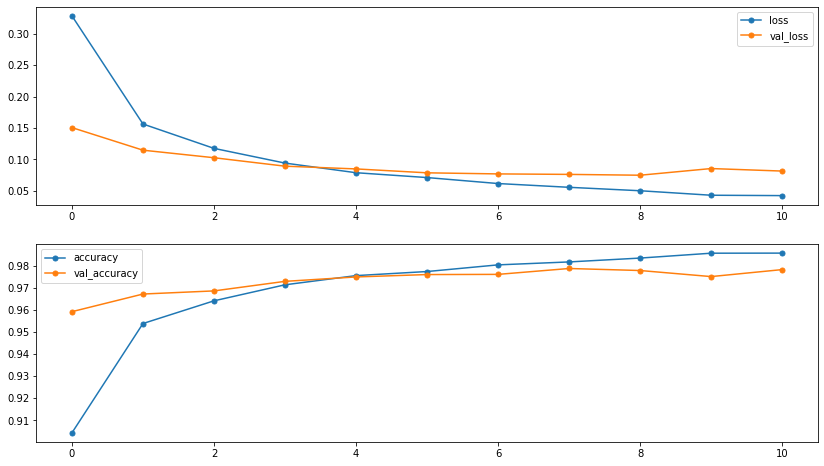

In [33]:
plt.figure(figsize=(14, 8))
plt.subplot(211)
plt.plot(metrics.index, metrics['loss'], marker = '.', markersize = 10, label='loss')
plt.plot(metrics.index, metrics['val_loss'], marker = '.', markersize = 10, label='val_loss')
plt.legend()
plt.subplot(212)
plt.plot(metrics.index, metrics['accuracy'], marker = '.', markersize = 10, label='accuracy')
plt.plot(metrics.index, metrics['val_accuracy'], marker = '.', markersize = 10, label='val_accuracy')
plt.legend()
plt.show()